In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

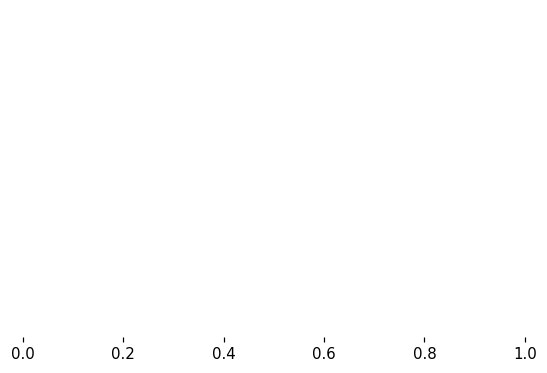

In [36]:
# plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['figure.dpi'] = 72*1.5
plt.tick_params(left=False, labelleft=False) #remove ticks
plt.box(False)


In [3]:
ldata = pd.read_csv('data/usnames.csv')
ldata.head()

,Name,F,M,Year
0,Aaron,0,102,1880
1,Ab,0,5,1880
2,Abbie,71,0,1880
3,Abbott,0,5,1880
4,Abby,6,0,1880


In [16]:
plotnames = ['Frankie', 'Jackie', 'Jordan', 'Leslie']

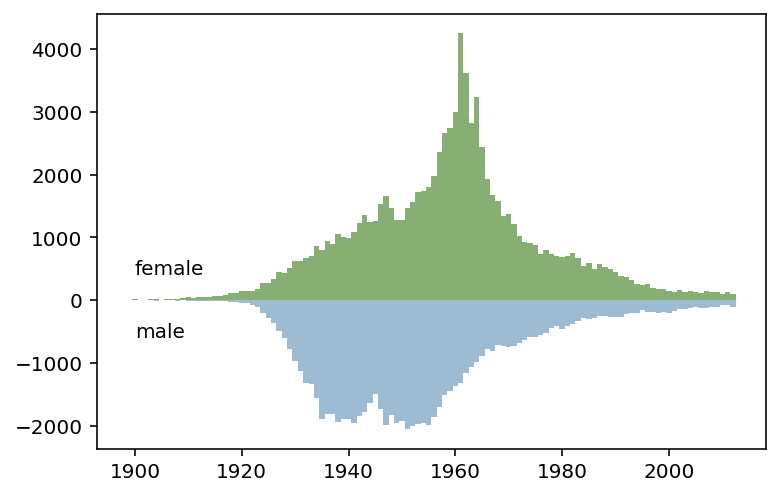

In [5]:
plotname = 'Jackie'
fem = np.array(ldata[ldata['Name'] == plotname]['F'])
mal = np.array(ldata[ldata['Name'] == plotname]['M'])
years = np.array(ldata[ldata['Name'] == plotname]['Year'])
plt.bar(years, fem, color = 'xkcd:sage', width = 1)
plt.bar(years, -mal, color = 'xkcd:light grey blue', width = 1)

plt.text(1900, 500, 'female', horizontalalignment='left', verticalalignment='center')
plt.text(1900, -500, 'male', horizontalalignment='left', verticalalignment='center')

plt.show()

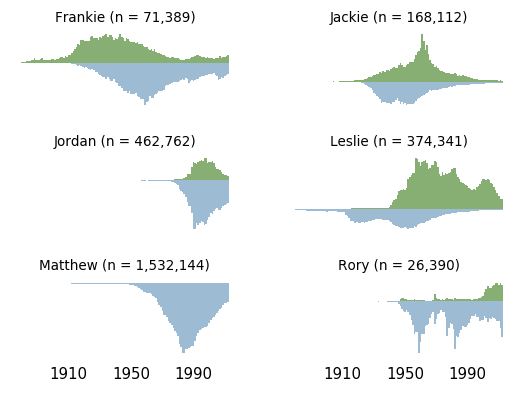

In [45]:
plot_rows = 3
plot_cols = 2
fig, axes = plt.subplots(
    plot_rows, 
    plot_cols, 
    subplot_kw=dict(),
    sharex='col', 
    facecolor='w'
)
# https://stackoverflow.com/questions/20057260/
fig.subplots_adjust(
    hspace=0.6, 
    wspace=0.2
)

plotnames_iter = iter(['Frankie', 'Jackie', 'Jordan', 'Leslie', 'Matthew',
                      'Rory'])
for subrow in range(plot_rows):
    for subcol in range(plot_cols):
        plotname = next(plotnames_iter)

        fem = np.array(ldata[ldata['Name'] == plotname]['F'])
        mal = np.array(ldata[ldata['Name'] == plotname]['M'])
        years = np.array(ldata[ldata['Name'] == plotname]['Year'])

        ax = axes[subrow, subcol]
        ax.bar(years, fem, color = 'xkcd:sage', width = 1)
        ax.bar(years, -mal, color = 'xkcd:light grey blue', width = 1)
        ax.set_title(
            f'{plotname} (n = {fem.sum() + mal.sum():,})', 
            fontsize=9
        )

#         ax.get_yaxis().set_major_formatter(
#             matplotlib.ticker.FuncFormatter(
#                 lambda x, p: format(abs(int(x)), ',')
#             )
#         )
        # https://stackoverflow.com/questions/2176424/
        ax.get_yaxis().set_visible(False)
        ax.get_xaxis().set_ticks([1910, 1950, 1990])
        [s.set_visible(False) for s in ax.spines.values()]
        [t.set_visible(False) for t in ax.get_xticklines()]
#         [t.set_visible(False) for t in ax.get_yticklines()]

# fig.show() #  ipython autodisplays